Esercizio per Anicca Vision:
Team A:
Francesco,Bruco,Enrico,Elia,Mike

Team B: Greta, Stefano, Samuele,Pese, Marco,Gaetano

Il Team A deve svolgere il compito entro mercoledì alle ore 20.00
Vietate comunicazioni tra Team (Greta e Francesco non parlate di questo)
Mentre il Team A lavora il B legge ma non interviene per nessuna ragione.
Posso intervenire solo io in caso di errori clamorosi.

Ipotesi sulla quale lavorare:
1) RENDIMENTI T-Bond al 6%
2) Costo del denaro in yen allo -0,1% come adesso.
3) Investiamo 100.000 usd
4) Bond 10 anni

Il Team A vuole creare una posizione data da:
- T-Bond ( per facilitá ipotizziamo prezzo 100 e cedola al 6%)
-darlo in garanzia e indebitarsi in yen
- cambiare gli yen in altri T-Bond sempre con rendimento 6%

Scopo della squadra A dire dalla A alla Z come impostare una posizione del genere, come si muove nel tempo, rischi, prospettive, probabile guadagno, cigni neri potenziali etccc.
NON SERVONO tecnicismi e formule ma una bella spiegazione facilmente comprensibile

GRUPPO B:
Una volta pubblicata la proposta della squadra A dovrá trovare gli errori, le debolezze, i rischi non valutati etc etc etc

Praticamente A mi vuole vendere questa posizione e B mi vuole far riflettere sui possibili problemi.

SCHEMA
 • Con 100k$ compro i T-bond.
 • Questi T-bond li metto come garanzia per prendere Yen (valore prestato in dollari 80K).
 • Compro altri 70k$ di T-bond (gli altri 10k$ inizio a ripagare il debito in attesa delle cedole annuali).
 • Con le cedole annuali, una di esse la utilizzerei per uno short a leva su dollaro yen con stop loss, mentre le altre le utilizzerei per ripagare il debito sullo yen.
 • Durante tutto questo periodo, tengo sotto controllo il mercato e i nostri bond per monitorare il livello raggiunto dai tassi e l'inflazione, agendo di conseguenza e ipotizzando anche una chiusura anticipata (a profitto) degli stessi o parte di essi.
 • Se dovessi chiudere anticipatamente perché in buon profitto, andrei a cercare zone del secondo mondo in crescita per prendere un immobile da mettere a reddito con un minimo del 5/6% di ritorno annuale (simile a possedere il bond di prima con l'aggiunta di una proprietà immobiliare), oppure investirei in asset che proteggono dall'inflazione, come l'oro.

Rischi / Cigni neri: 
 ⁃ Se, invece di scendere, i tassi salgono al 6/7%, non solo saremmo in perdita sul prezzo delle obbligazioni, ma anche con la leva, dato che il dollaro si rafforza rispetto allo yen. 
 ⁃ Nei prossimi 10 anni potrebbero verificarsi eventi geopolitici che porterebbero a una fluttuazione delle valute yen/dollaro, come sanzioni da parte della Cina, Russia o altre guerre che influenzerebbero l'economia.
 ⁃ Altro rischio da considerare sono alti tassi del 6/7% con un'alta inflazione al 5/6%, rendendo le nostre cedole inutili e costringendoci a mantenere la posizione in T-bond fino alla scadenza. L'unica soluzione sarebbe entrare gradualmente in asset anti-inflazionistici come l'oro.
 ⁃ Dato l'elevato indebitamento del Giappone, potrebbe scoppiare una bolla in Giappone, con conseguenze pertanto svalutando ulteriormente la valuta. 

Cigni bianchi: 
 ⁃ Se l'economia crolla e i tassi vengono riportati al 2/1.5%, i tassi rimangono invariati e l'inflazione è bassa, potremmo aprire altre posizioni con le cedole e ripagare il debito.

In [262]:
import pandas as pd 


import pandas as pd

interestRateUSA = pd.read_csv("/Users/stefanobutera/Desktop/FinancialEngineering/BondUSA1.csv")
interestRateJAP = pd.read_csv("/Users/stefanobutera/Desktop/FinancialEngineering/BondJPM123.csv")

# Converti la colonna 'DATE' in un formato datetime
interestRateUSA['DATE'] = pd.to_datetime(interestRateUSA['DATE'])

# Filtra per le righe in cui il giorno è il primo del mese
interestRateUSA = interestRateUSA[interestRateUSA['DATE'].dt.day == 1]

# Rimuovi le prime 12 righe
interestRateUSA = interestRateUSA.iloc[12:]

# Assicurati che i due DataFrame abbiano la stessa lunghezza
if len(interestRateUSA) > len(interestRateJAP):
    interestRateUSA = interestRateUSA.iloc[:len(interestRateJAP)]
elif len(interestRateJAP) > len(interestRateUSA):
    interestRateJAP = interestRateJAP.iloc[:len(interestRateUSA)]

# Ora puoi assegnare la colonna 'DATE' senza problemi
interestRateJAP['DATE'] = interestRateUSA['DATE'].values


# Ora, puoi impostare 'DATE' come indice per interestRateUSA
interestRateUSA.set_index('DATE', inplace=True)
interestRateJAP.set_index('DATE', inplace=True)

serieUSA = interestRateUSA['DFF']
serieJP = interestRateJAP['open']

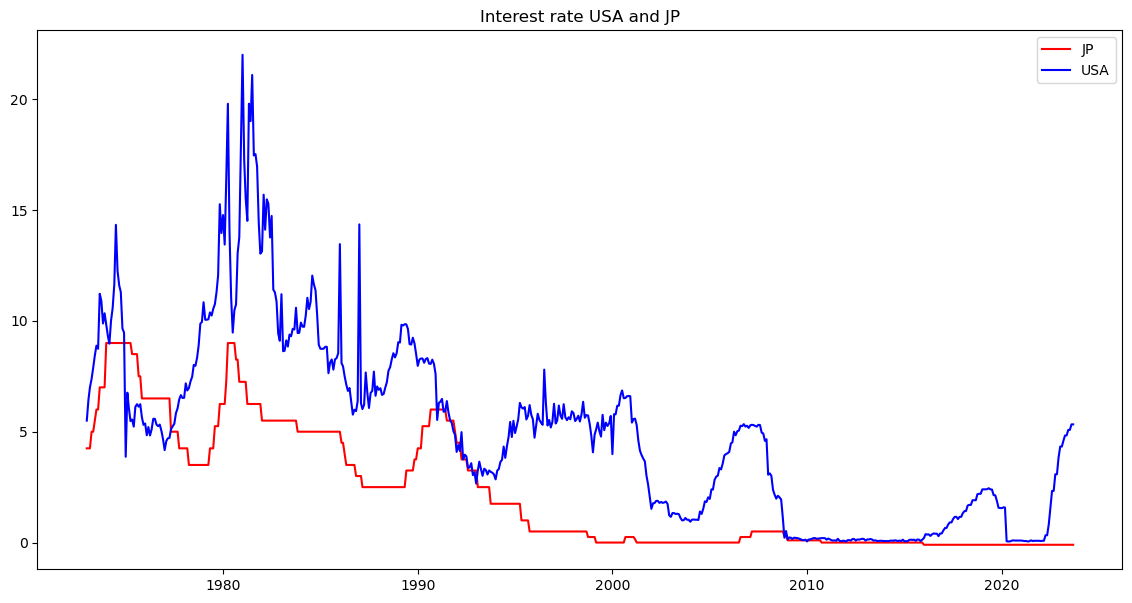

In [265]:

# Ora plottiamo
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

plt.plot(serieJP, label='JP', color='red')
plt.title('Interest rate USA and JP')
plt.plot(serieUSA, label='USA', color='blue')
plt.legend()
plt.show()


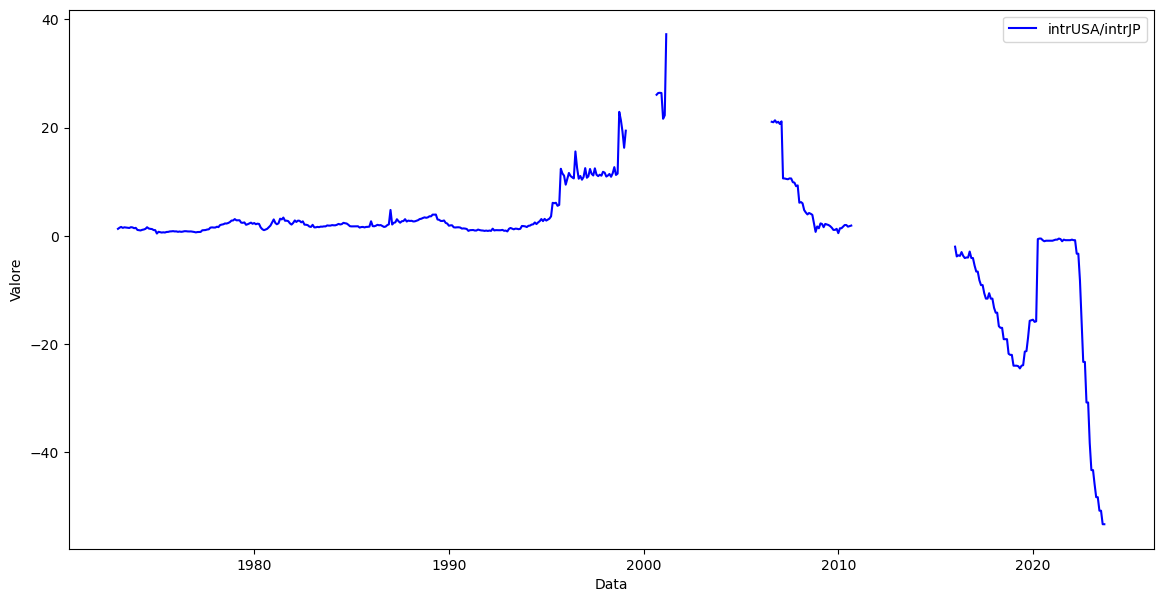

In [267]:
# verifichiamo se sia presente un rapporto di cointegrazione
import numpy as np
serieUSA = pd.to_numeric(serieUSA, errors='coerce')
serieJP = pd.to_numeric(serieJP, errors='coerce')
rap = serieUSA.div(serieJP, fill_value=np.nan)
plt.figure(figsize=(14,7))
plt.plot(rap, label='intrUSA/intrJP', color='blue')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.legend()
plt.show()



### Test Engle-Granger:

In [272]:
import statsmodels.api as sm

# Esegui il test di cointegrazione Test Engle-Granger:
coint_t, p_value, crit_value = sm.tsa.coint(serieUSA, serieJP)

print(f'T-statistica di cointegrazione: {coint_t}')
print(f'P-value: {p_value}')
print(f'Valori critici: {crit_value}')


T-statistica di cointegrazione: -3.4591115225951365
P-value: 0.03619631003765517
Valori critici: [-3.91454369 -3.34619796 -3.05143302]




Il valore della T-statistica di cointegrazione è -3.459, che è più grande (in termini assoluti) rispetto ai valori critici a tutti i livelli di significatività (90%, 95% e 99%), suggerendo che le due serie sono cointegrate. Il p-value è 0.036, che è inferiore a 0.05, confermando ulteriormente che le due serie sono cointegrate al livello di significatività del 5%.

### Test di Johansen:

In [273]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np

data_matrix = np.column_stack([serieUSA, serieJP])

# Esegui il test (assumendo un ordine di ritardo di 1 per la VAR)
result = coint_johansen(data_matrix, det_order=0, k_ar_diff=1)

# Visualizza i risultati
print("Autovalori (valori propri):", result.lr1)
print("Statistiche del test (trace statistic):", result.trace_stat)
print("Valori critici (al 90%, 95% e 99%):", result.trace_stat_crit_vals)


Autovalori (valori propri): [19.83214704  1.51905175]
Statistiche del test (trace statistic): [19.83214704  1.51905175]
Valori critici (al 90%, 95% e 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]



Questo test fornisce due statistiche, la statistica della traccia e la statistica del massimo autovalore. In questo caso, stiamo guardando solo la statistica della traccia. Gli autovalori sono 19.83 e 1.52. La statistica della traccia per il primo autovalore (19.83) è superiore ai valori critici al 90%, 95% e 99%, indicando che almeno una delle serie è cointegrata. Tuttavia, la statistica della traccia per il secondo autovalore (1.52) è inferiore ai valori critici a tutti i livelli di significatività, suggerendo che non c'è una seconda relazione di cointegrazione.


# In conclusione, sia il test di Engle-Granger che il test di Johansàen suggeriscono che esiste una relazione di cointegrazione tra i tassi di interesse americani e giapponesi. Questo significa che, nonostante le fluttuazioni a breve termine, le due serie tendono a muoversi insieme a lungo termine.